In [94]:
#Load the librarys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
#config notebook
%config InlineBackend.figure_format ='retina'
pd.set_option("display.max_rows", None, "display.max_columns", None)


1. โหลด csv เข้าไปใน Python Pandas

2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม

4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ

## Loading Data

In [95]:
def load_data_csv(path):
  dataframe = pd.read_csv(path, index_col = 0)
  return dataframe

In [96]:
df = load_data_csv('https://raw.githubusercontent.com/anuwatavis/dataset/master/german_credit_data_target.csv')

In [97]:
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [98]:
df.tail(10)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
990,37,male,1,own,NaN,NaN,3565,12,education,good
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good
992,23,male,1,rent,NaN,little,1936,18,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
994,50,male,2,own,NaN,NaN,2390,12,car,good
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [99]:

df.sample(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
68,37,male,2,free,little,NaN,1819,36,education,bad
624,65,male,2,free,little,little,2600,18,radio/TV,bad
399,43,female,1,own,rich,NaN,1516,24,radio/TV,good
538,42,male,3,free,little,little,7763,48,car,bad
758,31,male,2,own,little,NaN,1393,24,car,good
945,30,female,2,own,quite rich,moderate,8358,48,car,good
383,26,male,2,own,little,rich,1330,12,car,good
304,44,male,2,free,quite rich,NaN,10127,48,car,bad
327,34,female,2,own,rich,NaN,1525,24,car,good
522,53,male,2,free,little,little,7119,48,furniture/equipment,bad


# Exploring the Data

In [100]:
def info_describe_data (dataframe):
  print(dataframe.info())
  print(dataframe.describe())

def find_missing_values (dataframe) :
  print(dataframe.isna().sum())


In [101]:
info_describe_data(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None
               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000

In [102]:
find_missing_values(df)

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [103]:
#drop Saving accounts and Checking account columns
df = df.drop(columns=['Saving accounts', 'Checking account'])

<Figure size 864x576 with 0 Axes>

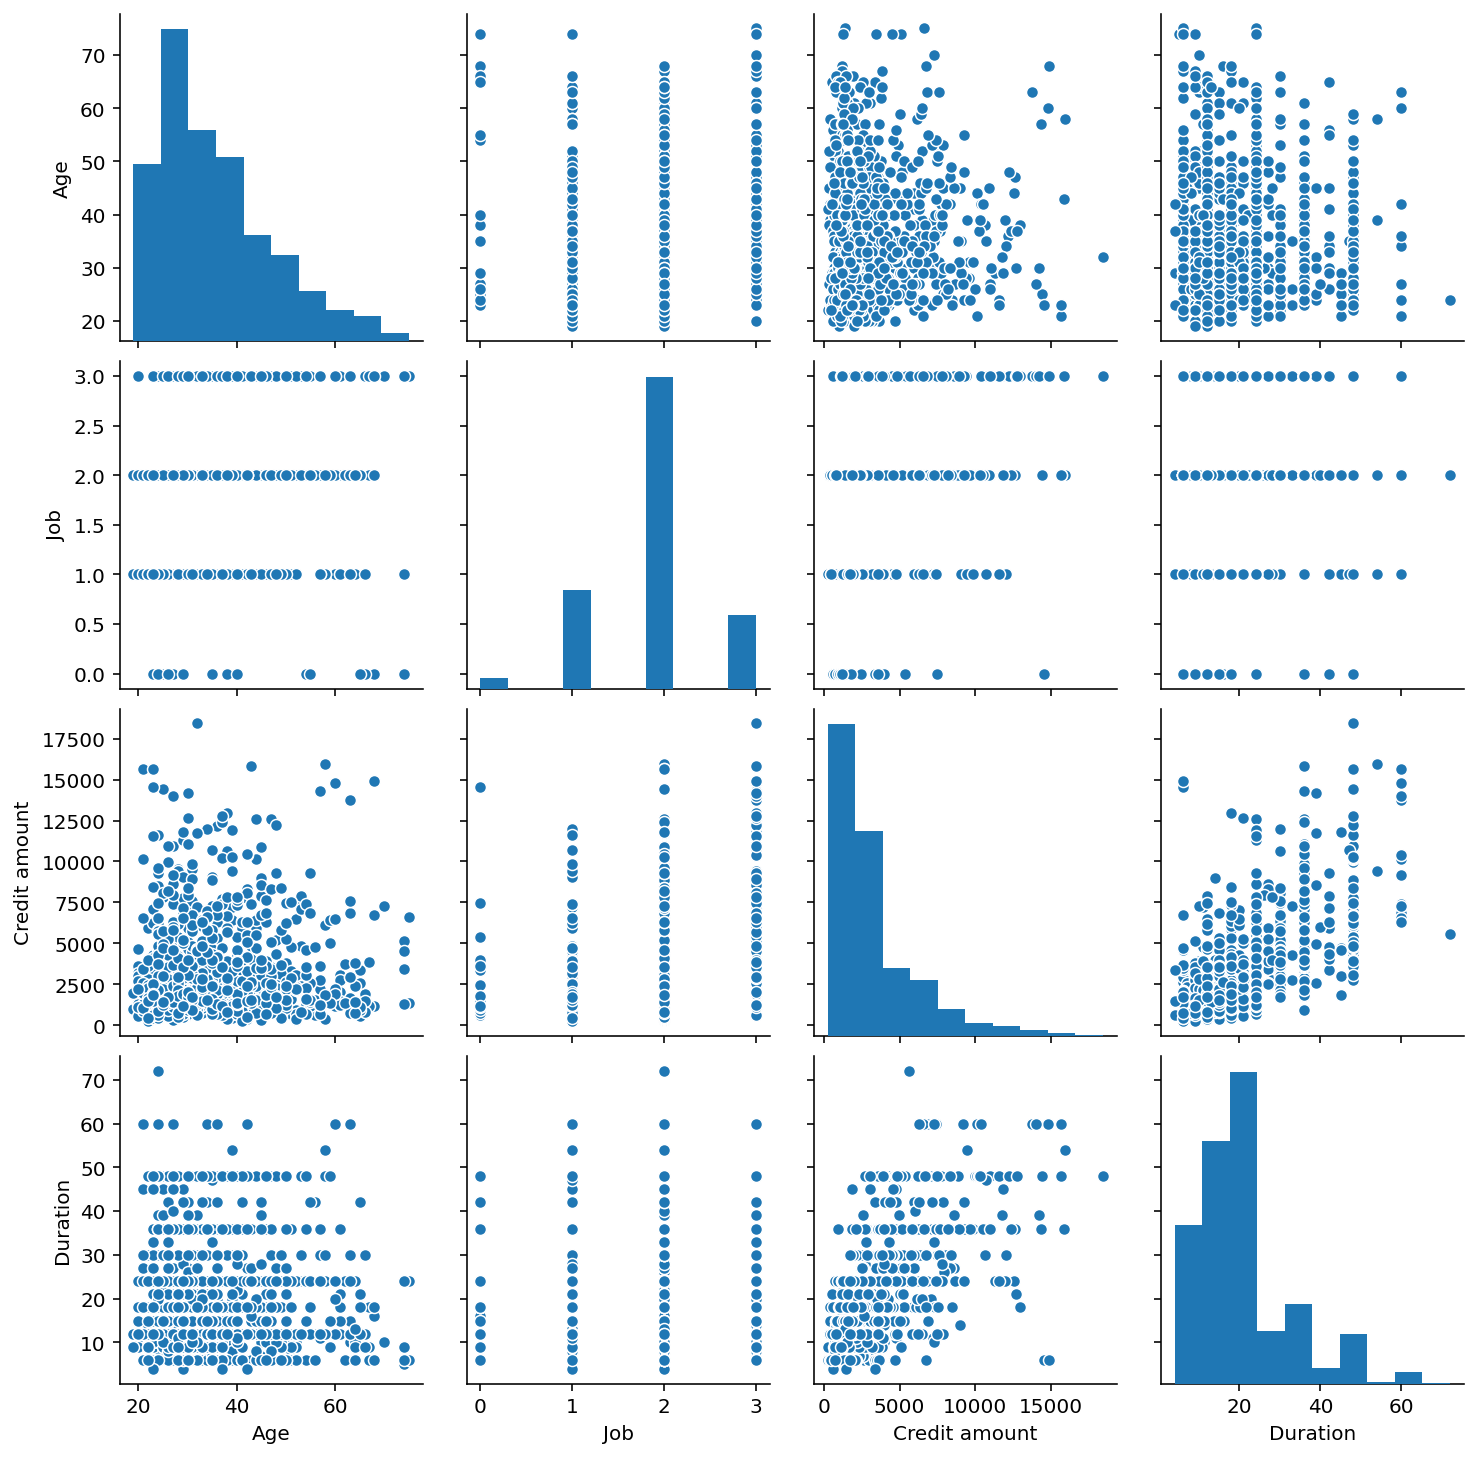

In [104]:
def pairplot(dataframe, weight, height):
  plt.figure(figsize=(weight, height))
  sns.pairplot(dataframe)
  plt.show()
pairplot(df, 12, 8)

6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์


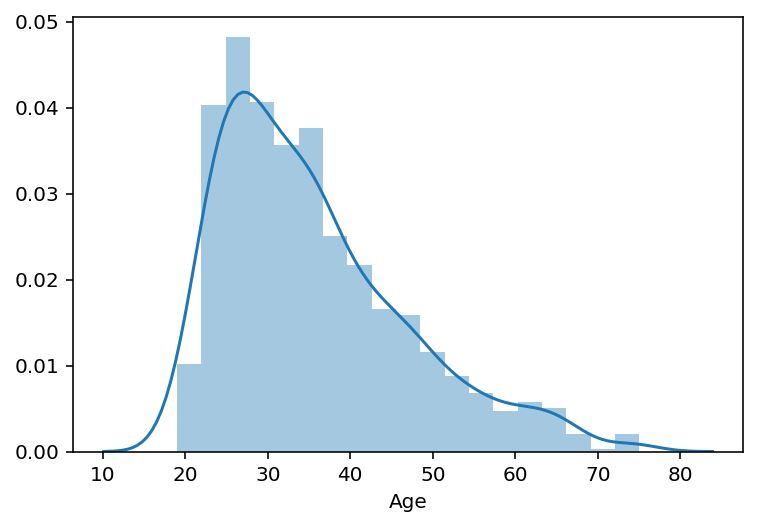

In [105]:
sns.distplot(df['Age'])

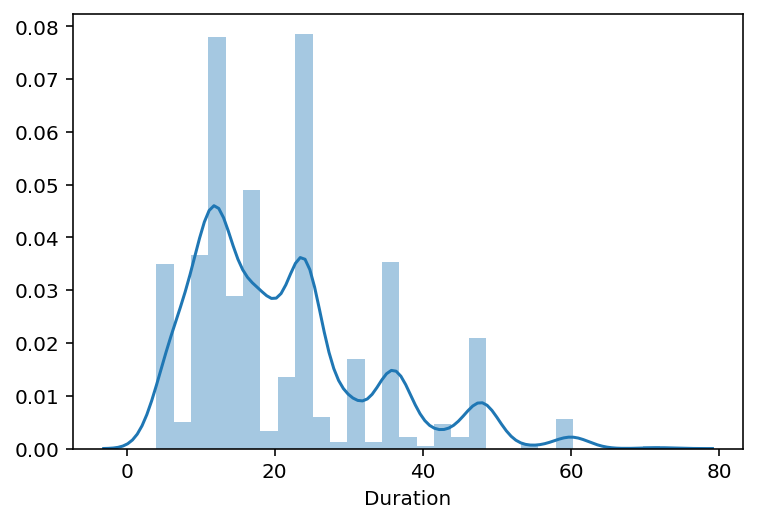

In [106]:
sns.distplot(df['Duration'])

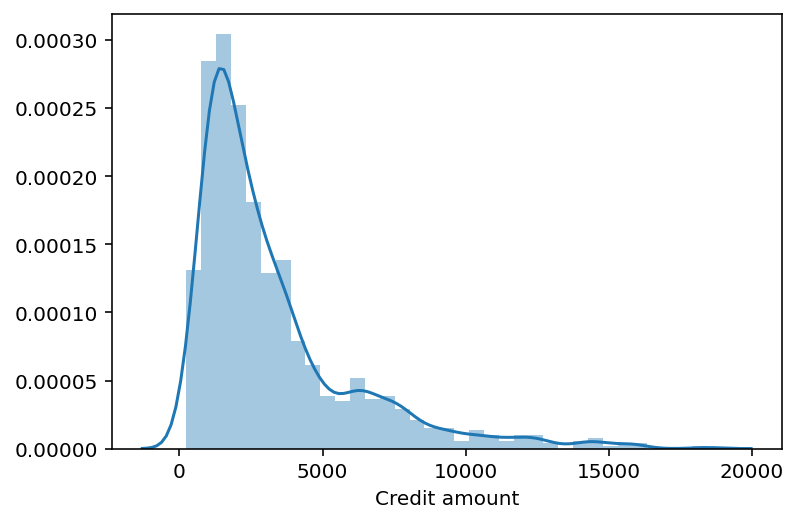

In [107]:
sns.distplot(df['Credit amount'])

In [108]:
#สร้าง Dummy Variable 
df = df.merge(pd.get_dummies(df.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)

In [109]:
df = df.merge(pd.get_dummies(df.Sex, drop_first = True , prefix = "Sex"), left_index = True, right_index = True)
df = df.merge(pd.get_dummies(df.Housing, drop_first = True , prefix = "Housing"), left_index = True, right_index = True)
df = df.merge(pd.get_dummies(df['Risk'], drop_first = True , prefix = "Risk"), left_index = True, right_index = True)

In [110]:
#deleter old featurn
del df["Purpose"]
del df["Sex"]
del df["Housing"]
del df["Risk"]

7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ


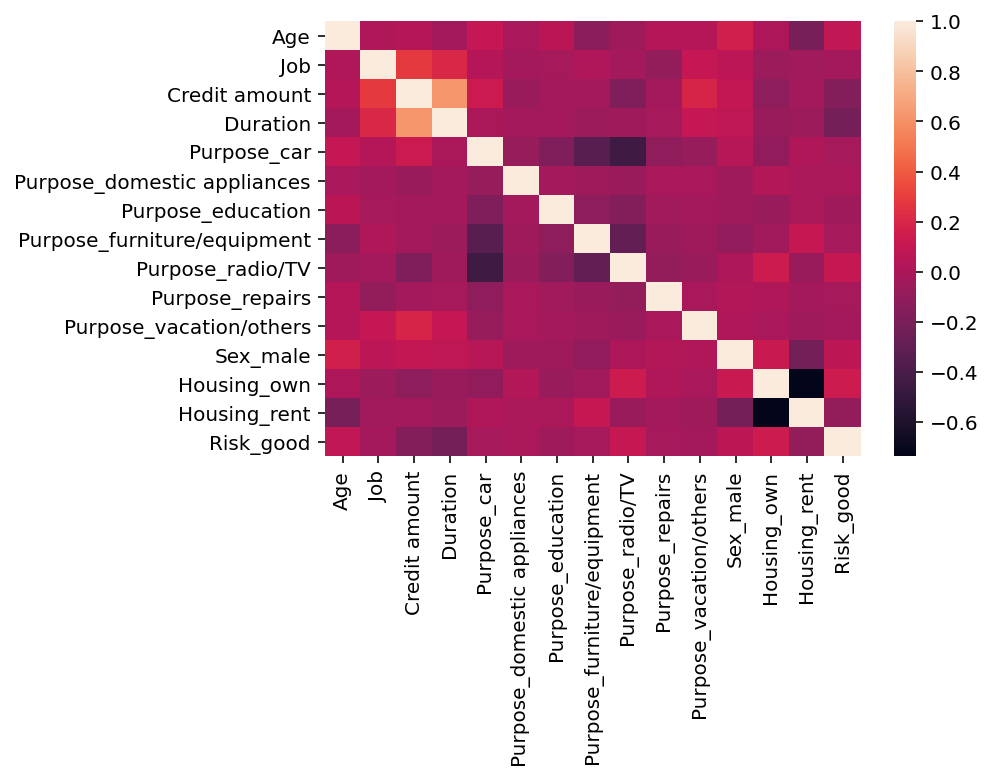

In [111]:
sns.heatmap(df.corr())

In [112]:
def find_max_corr(dataframe) :
  dataframe_corr = dataframe.corr()
  sorted_correlation = dataframe_corr.unstack().sort_values(ascending = False)
  return sorted_correlation
sort_correlation = find_max_corr(df)
sort_correlation

Risk_good                    Risk_good                      1.000000
Housing_rent                 Housing_rent                   1.000000
Job                          Job                            1.000000
Credit amount                Credit amount                  1.000000
Duration                     Duration                       1.000000
Purpose_car                  Purpose_car                    1.000000
Purpose_domestic appliances  Purpose_domestic appliances    1.000000
Purpose_education            Purpose_education              1.000000
Purpose_radio/TV             Purpose_radio/TV               1.000000
Purpose_repairs              Purpose_repairs                1.000000
Purpose_vacation/others      Purpose_vacation/others        1.000000
Sex_male                     Sex_male                       1.000000
Housing_own                  Housing_own                    1.000000
Purpose_furniture/equipment  Purpose_furniture/equipment    1.000000
Age                          Age  

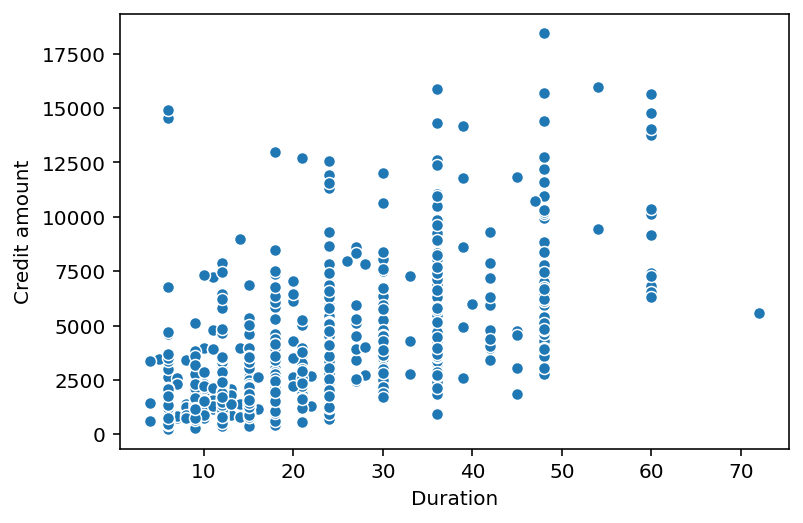

In [113]:
#max correlation ['Duration' , 'Credit amount' ,0.735968]
#min correlation ['Housing_own','Housing_rent', 0.003546]
sns.scatterplot(x = 'Duration', y = 'Credit amount', data = df)

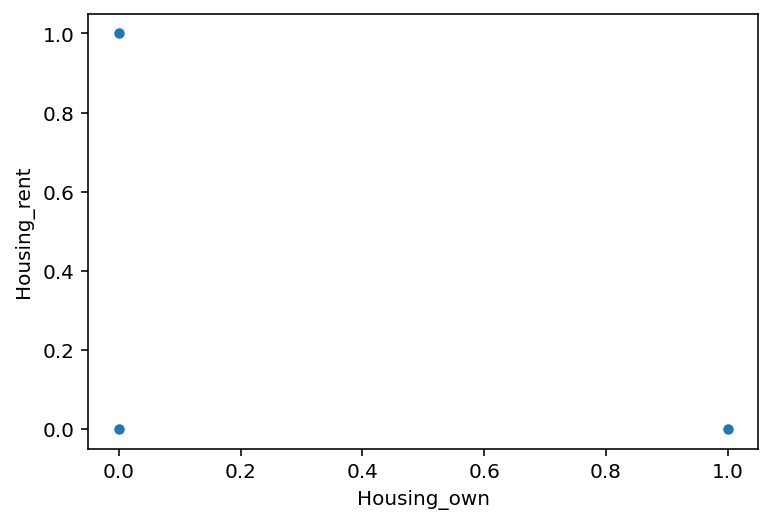

In [114]:

sns.scatterplot(x = 'Housing_own', y = 'Housing_rent', data = df)

10. สร้าง histogram ของ feature ที่สนใจ

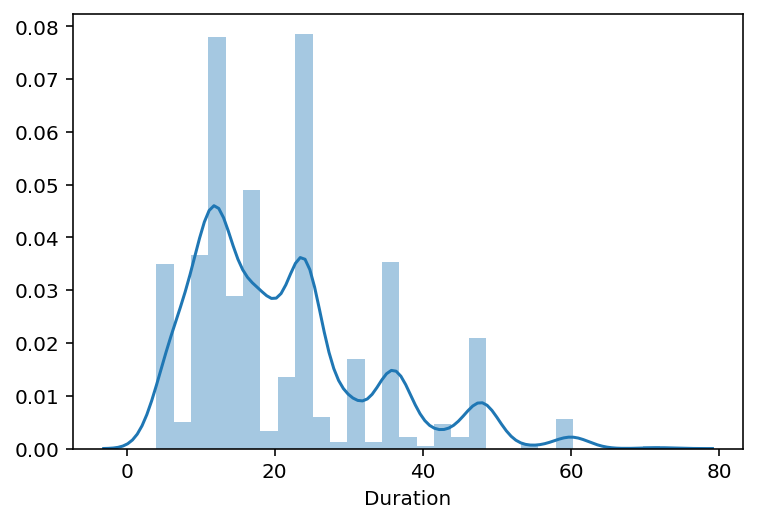

In [115]:
sns.distplot(df['Duration'])

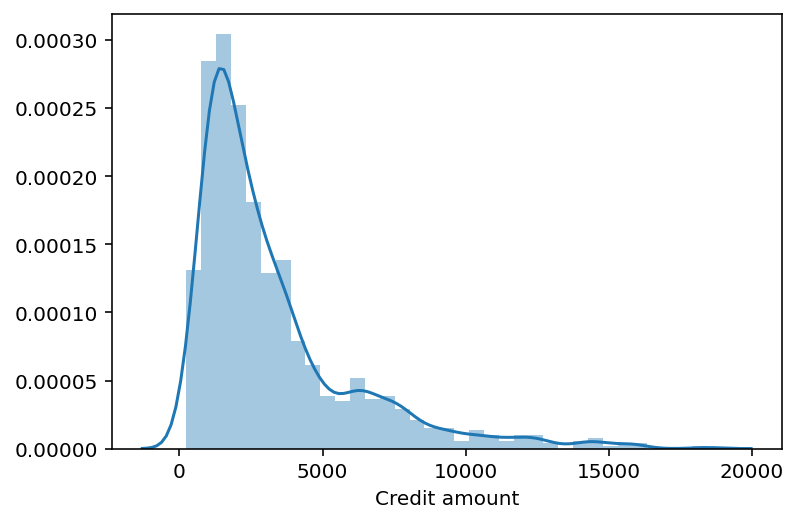

In [116]:
sns.distplot(df['Credit amount'])

11. สร้าง box plot ของ features ที่สนใจ

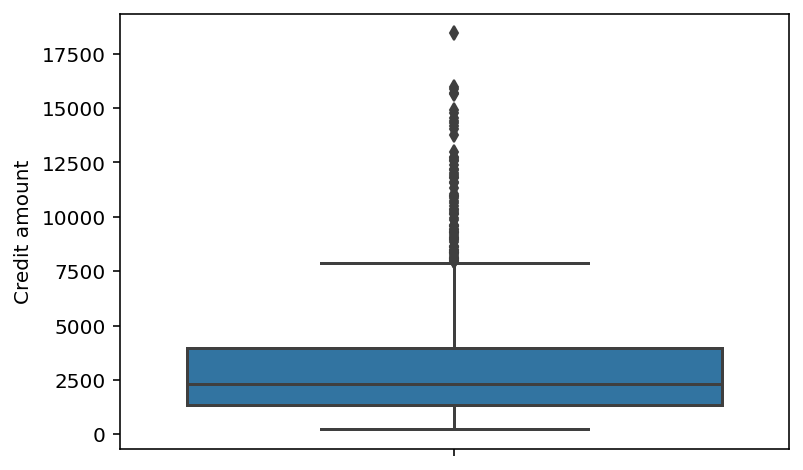

In [117]:
sns.boxplot(df['Credit amount'], orient='v')

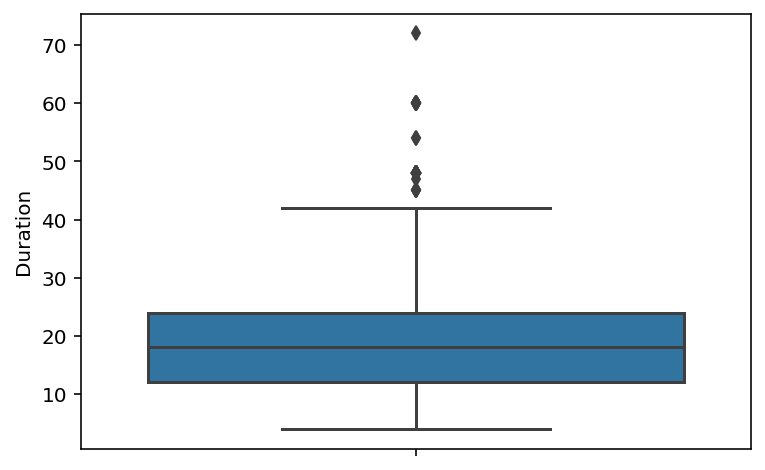

In [118]:
sns.boxplot(df['Duration'], orient='v')

13. ทำ Data Visualization อื่นๆ (แล้วแต่เลือก)

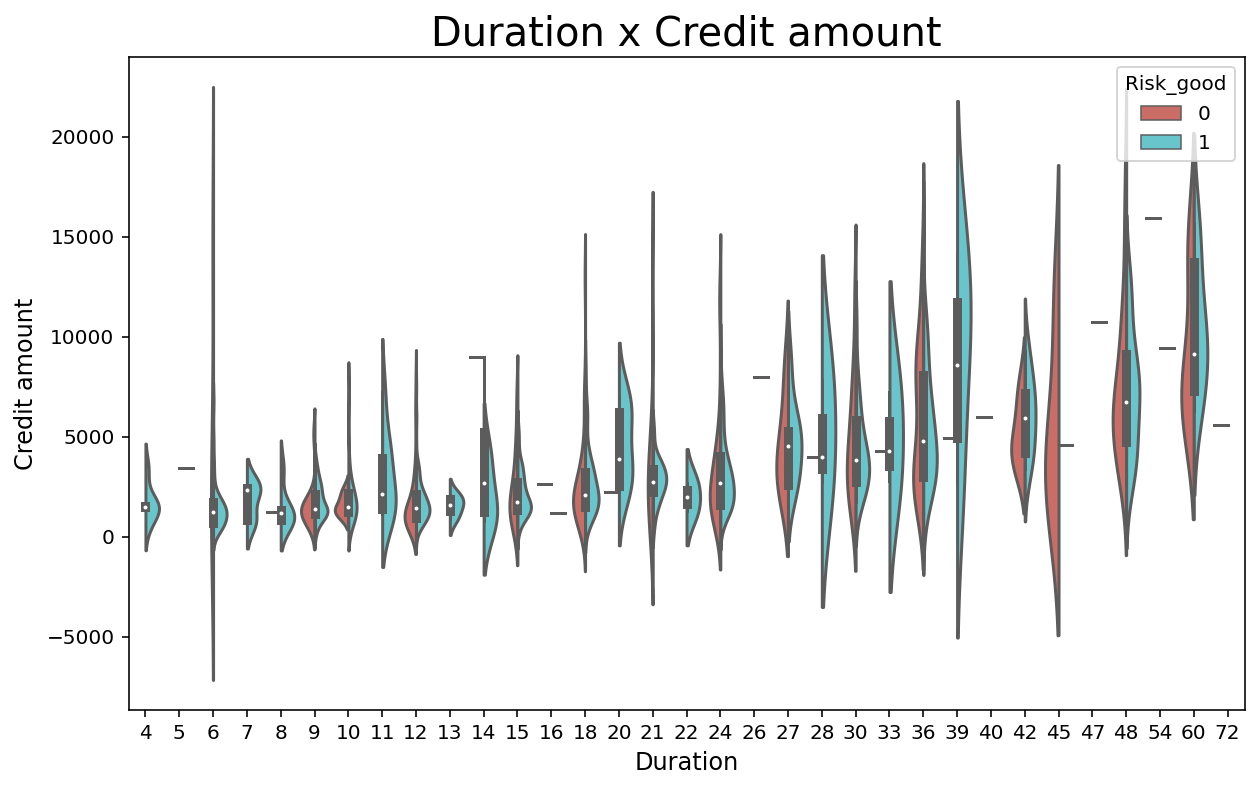

In [119]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Duration",y="Credit amount",data=df,
                   hue="Risk_good", palette="hls",split=True)
g.set_xlabel("Duration", fontsize=12)
g.set_ylabel("Credit amount", fontsize=12)
g.set_title("Duration x Credit amount", fontsize=20)

plt.show()


12. สร้าง train/test split ของข้อมูล สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจ
14. พิจารณาว่าควรทำ Normalization หรือ Standardization หรือไม่ควรทั้งสองอย่าง พร้อมให้เหตุผล

In [120]:
X = df.drop(columns=['Risk_good'], axis=0)
y = df['Risk_good']

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Defautl

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [123]:
rf = RandomForestClassifier()

In [124]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [126]:
predicted = rf.predict(X_test)

In [127]:
confusion_matrix(y_test, predicted)


array([[ 20,  45],
       [ 25, 160]])

In [128]:
accuracy_default = accuracy_score(y_test, predicted)
f1_default = f1_score(y_test, predicted)
precision_default = precision_score(y_test, predicted)
recall_default = recall_score(y_test, predicted)
print('Accuracy_score = ', accuracy_default)
print('F1_score = ', f1_default)
print('Precision score = ', precision_default)
print('Recall_score = ', recall_default)

Accuracy_score =  0.72
F1_score =  0.8205128205128206
Precision score =  0.7804878048780488
Recall_score =  0.8648648648648649


In [129]:
result = [[accuracy_default, f1_default, precision_default, recall_default]]
summary = pd.DataFrame(result,columns=['Accuracy','F1 score','Recall','Precision'],index=['Default'])
summary

,Accuracy,F1 score,Recall,Precision
Default,0.72,0.820513,0.780488,0.864865


# Standardization

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [131]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [132]:
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.sample(5)

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent
739,0.940686,0.150887,-0.708452,-0.735323,1.448852,-0.122004,-0.246618,-0.460034,-0.638067,-0.16122,-0.116248,0.677602,-1.552125,2.124784
378,-0.210379,0.150887,-0.419098,-0.237960,-0.690201,-0.122004,-0.246618,-0.460034,1.567234,-0.16122,-0.116248,0.677602,0.644278,-0.470636
407,1.383403,0.150887,-0.578452,-1.232685,-0.690201,-0.122004,-0.246618,-0.460034,1.567234,-0.16122,-0.116248,0.677602,0.644278,-0.470636
436,0.763599,1.680150,3.260023,0.259402,1.448852,-0.122004,-0.246618,-0.460034,-0.638067,-0.16122,-0.116248,-1.475793,-1.552125,-0.470636
657,-0.033292,0.150887,0.905707,1.254127,1.448852,-0.122004,-0.246618,-0.460034,-0.638067,-0.16122,-0.116248,0.677602,0.644278,-0.470636


In [133]:
X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.sample(5)

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent
130,-0.350274,1.670379,0.501392,1.247956,1.277333,-0.063372,-0.261488,-0.5,-0.580429,-0.110208,-0.089803,0.648425,-1.652678,-0.455773
101,-0.782072,-2.935445,-0.973722,-1.247956,1.277333,-0.063372,-0.261488,-0.5,-0.580429,-0.110208,-0.089803,0.648425,0.605079,-0.455773
114,2.067792,0.135104,-0.517130,0.249591,1.277333,-0.063372,-0.261488,-0.5,-0.580429,-0.110208,-0.089803,0.648425,0.605079,-0.455773
245,-0.782072,0.135104,-0.737081,-0.915168,-0.782881,-0.063372,-0.261488,-0.5,1.722862,-0.110208,-0.089803,0.648425,0.605079,-0.455773
87,2.499589,0.135104,-0.272329,-0.249591,-0.782881,-0.063372,-0.261488,-0.5,1.722862,-0.110208,-0.089803,0.648425,-1.652678,-0.455773


In [134]:
rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
predicted = rf2.predict(X_test)

In [136]:
confusion_matrix(y_test, predicted)


array([[ 20,  45],
       [ 30, 155]])

In [137]:
accuracy_std = accuracy_score(y_test, predicted)
f1_std = f1_score(y_test, predicted)
precision_std = precision_score(y_test, predicted)
recall_std = recall_score(y_test, predicted)
print('Accuracy_score = ', accuracy_std)
print('F1_score = ', f1_std)
print('Precision score = ', precision_std)
print('Recall_score = ', recall_std)

Accuracy_score =  0.7
F1_score =  0.8051948051948051
Precision score =  0.775
Recall_score =  0.8378378378378378


In [138]:
result = [[accuracy_std, f1_std, precision_std, recall_std]]
prepare = pd.DataFrame(result,columns=['Accuracy','F1 score','Recall','Precision'],index=['Standardization'])
summary = summary.append(prepare)
summary

,Accuracy,F1 score,Recall,Precision
Default,0.72,0.820513,0.780488,0.864865
Standardization,0.70,0.805195,0.775000,0.837838


# Normalization

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [140]:
from sklearn.preprocessing import StandardScaler
min_max_scaler = MinMaxScaler()

In [141]:
X_train = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.sample(5)

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent
73,0.089286,0.333333,0.151256,0.294118,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
279,0.285714,1.000000,0.367644,0.470588,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
62,0.321429,0.666667,0.408254,0.647059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
519,0.517857,0.666667,0.055764,0.073529,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
10,0.517857,0.333333,0.108276,0.088235,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [142]:
X_test = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.sample(5)

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent
28,0.272727,0.666667,0.346443,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,0.054545,0.000000,0.239519,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50,0.181818,0.666667,0.101734,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
239,0.563636,0.666667,0.180391,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
48,0.090909,0.666667,0.069234,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [143]:
rf3 = RandomForestClassifier()
rf3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [144]:
predicted = rf3.predict(X_test)

In [145]:
confusion_matrix(y_test, predicted)


array([[ 20,  45],
       [ 31, 154]])

In [146]:
accuracy_nor = accuracy_score(y_test, predicted)
f1_nor = f1_score(y_test, predicted)
precision_nor = precision_score(y_test, predicted)
recall_nor = recall_score(y_test, predicted)
print('Accuracy_score = ', accuracy_nor)
print('F1_score = ', f1_nor)
print('Precision score = ', precision_nor)
print('Recall_score = ', recall_nor)

Accuracy_score =  0.696
F1_score =  0.8020833333333335
Precision score =  0.7738693467336684
Recall_score =  0.8324324324324325


In [147]:
result = [[accuracy_nor, f1_nor, precision_nor, recall_nor]]
prepare = pd.DataFrame(result,columns=['Accuracy','F1 score','Recall','Precision'],index=['MinMaxNormalization'])
summary = summary.append(prepare)
summary

,Accuracy,F1 score,Recall,Precision
Default,0.720,0.820513,0.780488,0.864865
Standardization,0.700,0.805195,0.775000,0.837838
MinMaxNormalization,0.696,0.802083,0.773869,0.832432


15. เลือกช้อยที่ดีที่สุดจากข้อ 14 (หรือจะทำทุกอันแล้วนำมาเปรียบเทียบก็ได้)
16. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, 
F1 score, Recall, Precision


In [148]:
summary

,Accuracy,F1 score,Recall,Precision
Default,0.720,0.820513,0.780488,0.864865
Standardization,0.700,0.805195,0.775000,0.837838
MinMaxNormalization,0.696,0.802083,0.773869,0.832432


17. หาค่า parameter combination ที่ดีที่สุด สำหรับ Dataset นี้ โดยใช้ GridSearch (Hyperparameter Tuning)


# Hyperparameter

In [149]:
from sklearn.model_selection import GridSearchCV
param_combination = {'max_depth': [4, 8, 16 ,32, 64], 'min_samples_leaf' : [1, 2, 4, 8, 16]}
grid_search = GridSearchCV(RandomForestClassifier(), param_combination, verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.687, total=   0.2s
[CV] max_depth=4, min_samples_leaf=1 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..... max_depth=4, min_samples_leaf=1, score=0.680, total=   0.2s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.713, total=   0.2s
[CV] max_depth=4, min_samples_leaf=1 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ..... max_depth=4, min_samples_leaf=1, score=0.707, total=   0.2s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.693, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.687, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.687, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.693, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.693, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.693, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   20.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [150]:
grid_search.best_params_

{'max_depth': 32, 'min_samples_leaf': 4}

In [151]:
grid_predicted = grid_search.predict(X_test)
confusion_matrix(y_test, grid_predicted)

array([[ 14,  51],
       [ 15, 170]])

In [152]:
accuracy_grid = accuracy_score(y_test, grid_predicted)
f1_grid = f1_score(y_test, grid_predicted)
precision_grid = precision_score(y_test, grid_predicted)
recall_grid = recall_score(y_test, grid_predicted)
print('Accuracy_score = ', accuracy_grid)
print('F1_score = ', f1_grid)
print('Precision score = ', precision_grid)
print('Recall_score = ', recall_grid)
result = [[accuracy_grid, f1_grid, precision_grid, recall_grid]]
prepare = pd.DataFrame(result,columns=['Accuracy','F1 score','Recall','Precision'],index=['Hyperparameter Tuning'])
summary = summary.append(prepare)
summary

Accuracy_score =  0.736
F1_score =  0.8374384236453202
Precision score =  0.7692307692307693
Recall_score =  0.918918918918919


,Accuracy,F1 score,Recall,Precision
Default,0.720,0.820513,0.780488,0.864865
Standardization,0.700,0.805195,0.775000,0.837838
MinMaxNormalization,0.696,0.802083,0.773869,0.832432
Hyperparameter Tuning,0.736,0.837438,0.769231,0.918919


# Hyperparameter + Standardization

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [155]:
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.sample(5)

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent
743,0.320881,1.680150,0.033104,0.259402,-0.690201,-0.122004,-0.246618,2.173750,-0.638067,-0.16122,-0.116248,0.677602,-1.552125,2.124784
138,-1.007270,0.150887,-0.408964,-1.232685,1.448852,-0.122004,-0.246618,-0.460034,-0.638067,-0.16122,-0.116248,0.677602,0.644278,-0.470636
88,-0.476010,0.150887,1.706321,1.254127,1.448852,-0.122004,-0.246618,-0.460034,-0.638067,-0.16122,-0.116248,-1.475793,0.644278,-0.470636
182,1.560490,0.150887,0.566031,0.259402,1.448852,-0.122004,-0.246618,-0.460034,-0.638067,-0.16122,-0.116248,0.677602,-1.552125,-0.470636
126,-0.653096,0.150887,-0.337674,0.259402,-0.690201,-0.122004,-0.246618,-0.460034,1.567234,-0.16122,-0.116248,0.677602,0.644278,-0.470636


In [156]:
X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.sample(5)

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent
149,-1.127510,1.670379,3.051035,0.249591,1.277333,-0.063372,-0.261488,-0.5,-0.580429,-0.110208,-0.089803,-1.542199,-1.652678,2.194072
130,-0.350274,1.670379,0.501392,1.247956,1.277333,-0.063372,-0.261488,-0.5,-0.580429,-0.110208,-0.089803,0.648425,-1.652678,-0.455773
128,-0.436634,0.135104,-0.160685,-0.915168,1.277333,-0.063372,-0.261488,-0.5,-0.580429,-0.110208,-0.089803,-1.542199,-1.652678,2.194072
11,-1.041150,0.135104,0.471348,2.246322,1.277333,-0.063372,-0.261488,-0.5,-0.580429,-0.110208,-0.089803,0.648425,-1.652678,-0.455773
225,-0.782072,0.135104,-0.699248,-0.998365,-0.782881,-0.063372,-0.261488,-0.5,-0.580429,-0.110208,-0.089803,-1.542199,0.605079,-0.455773


In [157]:
from sklearn.model_selection import GridSearchCV
param_combination = {'max_depth': [4, 8, 16 ,32, 64], 'min_samples_leaf' : [1, 2, 4, 8, 16]}
grid_search = GridSearchCV(RandomForestClassifier(), param_combination, verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.687, total=   0.2s
[CV] max_depth=4, min_samples_leaf=1 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..... max_depth=4, min_samples_leaf=1, score=0.700, total=   0.2s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.687, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ..... max_depth=4, min_samples_leaf=1, score=0.687, total=   0.2s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.693, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.687, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.707, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.720, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.693, total=   0.2s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.687, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   20.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [158]:
grid_search.best_params_

{'max_depth': 64, 'min_samples_leaf': 4}

In [159]:
grid_predicted_standard = grid_search.predict(X_test)
confusion_matrix(y_test, grid_predicted_standard)

array([[ 10,  55],
       [ 13, 172]])

In [160]:
accuracy_grid_std = accuracy_score(y_test, grid_predicted_standard)
f1_grid_std = f1_score(y_test, grid_predicted_standard)
precision_grid_std = precision_score(y_test, grid_predicted_standard)
recall_grid_std = recall_score(y_test, grid_predicted_standard)
print('Accuracy_score = ', accuracy_grid_std)
print('F1_score = ', f1_grid_std)
print('Precision score = ', precision_grid_std)
print('Recall_score = ', recall_grid_std)
result = [[accuracy_grid_std, f1_grid_std, precision_grid_std, recall_grid_std]]
prepare = pd.DataFrame(result,columns=['Accuracy','F1 score','Recall','Precision'],index=['Hyperparameter Tuning + Standardization'])
summary = summary.append(prepare)
summary

Accuracy_score =  0.728
F1_score =  0.8349514563106797
Precision score =  0.7577092511013216
Recall_score =  0.9297297297297298


,Accuracy,F1 score,Recall,Precision
Default,0.720,0.820513,0.780488,0.864865
Standardization,0.700,0.805195,0.775000,0.837838
MinMaxNormalization,0.696,0.802083,0.773869,0.832432
Hyperparameter Tuning,0.736,0.837438,0.769231,0.918919
Hyperparameter Tuning + Standardization,0.728,0.834951,0.757709,0.929730


In [161]:
#best evaluation in decistion tree model (from last quiz in decision tree lesson)
##Hyperparameter Tuning + Normalization	[0.692	0.797900	0.775510	0.821622]
#best evaluation in random forest model ()
##Hyperparameter Tuning + Normalizatio	[0.736	0.837438	0.769231 0.918919]

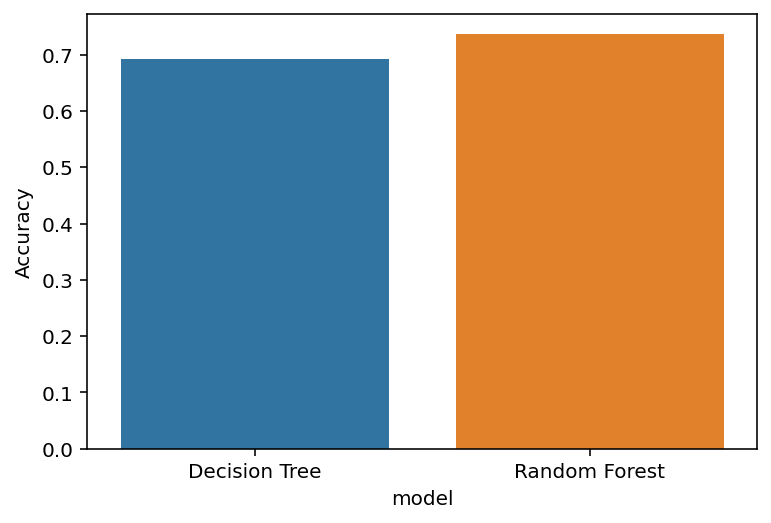

In [166]:
dic_1= {'model' : ['Decision Tree', 'Random Forest'], 'Accuracy' : [0.692, 0.736]}
chart_compare = pd.DataFrame(data = dic_1)
sns.barplot(x="model", y="Accuracy", data=chart_compare)

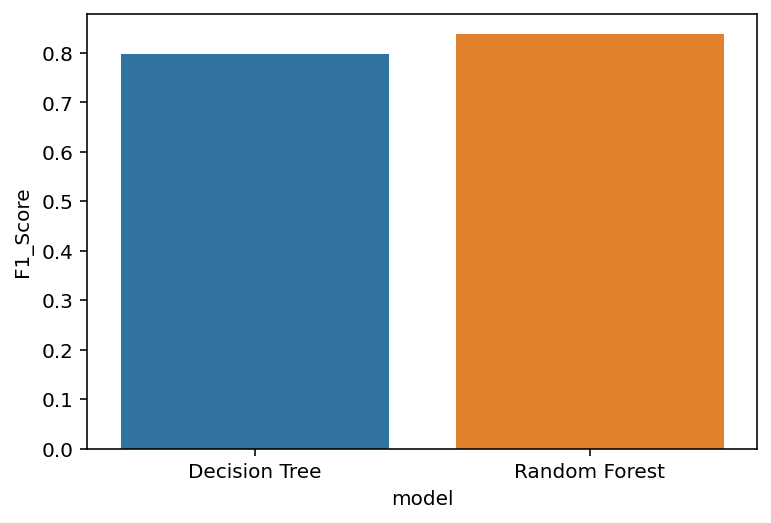

In [170]:
dic_2= {'model' : ['Decision Tree', 'Random Forest'], 'F1_Score' : [0.797900, 0.837438]	}
chart_compare = pd.DataFrame(data = dic_2)
sns.barplot(x="model", y="F1_Score", data=chart_compare)

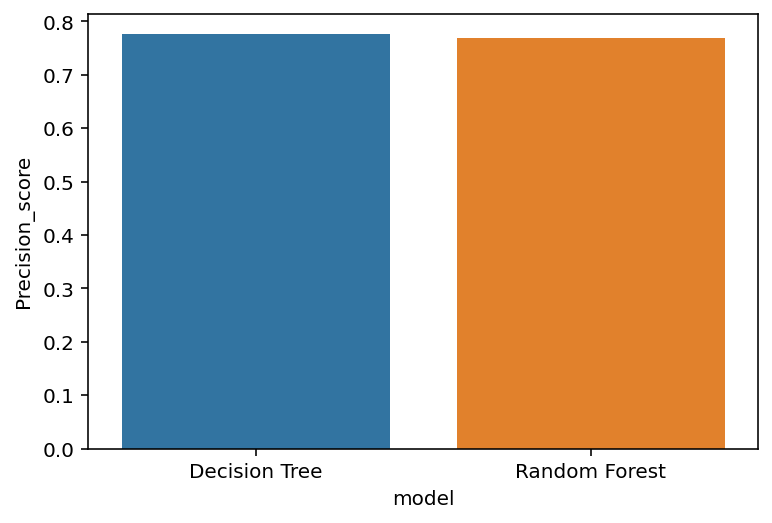

In [168]:
dic_3= {'model' : ['Decision Tree', 'Random Forest'], 'Precision_score' : [0.775510, 0.769231]}
chart_compare = pd.DataFrame(data = dic_3)
sns.barplot(x="model", y="Precision_score", data=chart_compare)

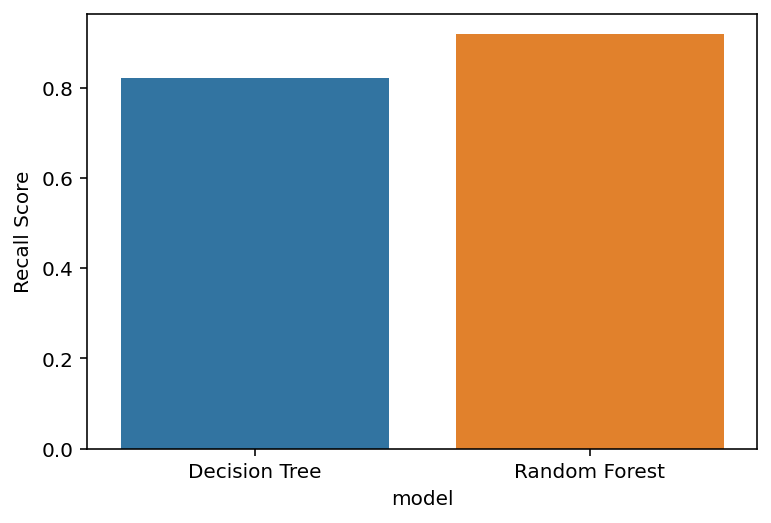

In [169]:
dic_4= {'model' : ['Decision Tree', 'Random Forest'], 'Recall Score' : [0.821622, 0.918919]}
chart_compare = pd.DataFrame(data = dic_4)
sns.barplot(x="model", y="Recall Score", data=chart_compare)